In [1]:
import pandas as pd

In [3]:
tennis_data = pd.read_csv('playtennis.csv')

In [16]:
tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [6]:
#  tennis_data 의 outlook 컬럼의  sunny의 값을 0으로 바꿔서 컬럼을 반환 -> 기존 칼럼은 데이터 안 바뀜
tennis_data.Outlook.replace("Sunny", 0 ) # inplace = True 로하면 바로 적용(기존 칼럼 데이터 바뀜)

0            0
1            0
2     Overcast
3         Rain
4         Rain
5         Rain
6     Overcast
7            0
8            0
9         Rain
10           0
11    Overcast
12    Overcast
13        Rain
Name: Outlook, dtype: object

In [9]:
tennis_data.columns

Index(['Outlook', 'Temperature', 'Humidity', 'Wind', 'PlayTennis'], dtype='object')

In [28]:
from sklearn.preprocessing import LabelEncoder

columns = ['Outlook', 'Temperature', 'Humidity', 'Wind', 'PlayTennis']
df = pd.DataFrame()
le = LabelEncoder()
for column in objects:
    le.fit(tennis_data[column])
    new_col = '{}_encoded'.format(column)
    tennis_data[new_col] = le.transform(tennis_data[column] )

In [34]:
for col in columns: 
    print(col, "의 인코딩 정보입니다!")
    print(tennis_data.filter(regex = col).value_counts())
    print("-"*30)

Outlook 의 인코딩 정보입니다!
Outlook   Outlook_encoded
Sunny     2                  5
Rain      1                  5
Overcast  0                  4
dtype: int64
------------------------------
Temperature 의 인코딩 정보입니다!
Temperature  Temperature_encoded
Mild         2                      6
Hot          1                      4
Cool         0                      4
dtype: int64
------------------------------
Humidity 의 인코딩 정보입니다!
Humidity  Humidity_encoded
Normal    1                   7
High      0                   7
dtype: int64
------------------------------
Wind 의 인코딩 정보입니다!
Wind    Wind_encoded
Weak    1               8
Strong  0               6
dtype: int64
------------------------------
PlayTennis 의 인코딩 정보입니다!
PlayTennis  PlayTennis_encoded
Yes         1                     9
No          0                     5
dtype: int64
------------------------------


In [40]:
encoded_cols = tennis_data.filter(regex = 'encoded').columns
df_en = tennis_data[encoded_cols]
df_en

,Outlook_encoded,Temperature_encoded,Humidity_encoded,Wind_encoded,PlayTennis_encoded
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


# Decision Tree
- Test/ Train set 분리

In [57]:
x = df_en.iloc[:,0:4]
y = df_en['PlayTennis_encoded']

In [61]:
from sklearn.model_selection import train_test_split
 #train_test_split(x,y, test_size =0.2)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2)

In [66]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=0)
# a ahepf 
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [71]:
dt_pred = dt_clf.predict(x_test)
dt_pred

array([0, 1, 1])

In [72]:
y_test

1     0
9     1
13    0
Name: PlayTennis_encoded, dtype: int32

In [75]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, dt_pred).round(4)

0.6667

# Decision Tree의 모델 파악하기

In [81]:
#! pip install pydotplus
import pydotplus

### Decision Tree의 내용을 Text(Dot 형식)으로 출력

#### feature_names : 독립변수의 값(순서대로)
#### class_names : 종속변수의 값(0,1 순서)

In [80]:
from sklearn import tree # text형태로 tree 
dt_dot_data = tree.export_graphviz(
                        dt_clf,
                        feature_names= ["Outlook", "Teperature","Humidity","Wind"],
                        class_names=["No", "Yes"]
)

dt_dot_data

'digraph Tree {\nnode [shape=box] ;\n0 [label="Outlook <= 0.5\\ngini = 0.397\\nsamples = 11\\nvalue = [3, 8]\\nclass = Yes"] ;\n1 [label="gini = 0.0\\nsamples = 4\\nvalue = [0, 4]\\nclass = Yes"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Humidity <= 0.5\\ngini = 0.49\\nsamples = 7\\nvalue = [3, 4]\\nclass = Yes"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Outlook <= 1.5\\ngini = 0.444\\nsamples = 3\\nvalue = [2, 1]\\nclass = No"] ;\n2 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 1]\\nclass = Yes"] ;\n3 -> 4 ;\n5 [label="gini = 0.0\\nsamples = 2\\nvalue = [2, 0]\\nclass = No"] ;\n3 -> 5 ;\n6 [label="Wind <= 0.5\\ngini = 0.375\\nsamples = 4\\nvalue = [1, 3]\\nclass = Yes"] ;\n2 -> 6 ;\n7 [label="Teperature <= 1.0\\ngini = 0.5\\nsamples = 2\\nvalue = [1, 1]\\nclass = No"] ;\n6 -> 7 ;\n8 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0]\\nclass = No"] ;\n7 -> 8 ;\n9 [label="gini = 0.0\\nsamples = 1\\nvalue = [

In [88]:
dot_data = pydotplus.graph_from_dot_data(dt_dot_data).create_png()
dot_data

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02]\x00\x00\x02\xe0\x08\x02\x00\x00\x00!\xb4U\xd7\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx\x9c\xec\xdd{t\x1b\xe5\x99?\xf0wr\x81rI\xad\xf4\xa42IX\x07(5d\x0bu6-\xd4\xa1[R\x1c\xb69\x84\x8e\xb2\xa7k\xbbv\xb6^\x96m\xecJ=\xb8$\xd8\x94\x10F?Cm\x08P\x89[\xb2X\x95\xccR\xd7%\x92qh\x17\x8b\xcb\xb2\xc5N\x1d\xd8X\'-T\xda\x96\xa66\xc4 A\x02\x1a\xd2\x83\xa6\xc0\xd6%\x97\xf9\xfd\xf14\xe3at\xb1\xac\xdbH\x9a\xef\xe7\x8f\x1cif4\xf3(#\xeb\xd1\xfb\xce;\xcf\xcb\xc9\xb2\xcc\x00\x00\x00\x801\xc6\xd8<\xbd\x03\x00\x00\x00("\xc8\x8b\x00\x00\x003\x90\x17\x01\x00\x00f,\xd0;\x00\x98\xb3\xf1\xf1\xf17\xdf|S\xef( \x95+\xae\xb8\xe2\xdcs\xcf\xd5;\n\x00\xc8\x04\x87q7%\xa7\xa1\xa1a\xcf\x9e=zG\x01\xa9\x0c\x0e\x0e666\xea\x1d\x05\x00d\x02\xed\xc5\x92T__?44\xa4w\x14\x90\x18\xc7qz\x87\x00\x00\x99\xc3\xf5E\x00\x00\x80\x19\xc8\x8b\x00\x00\x003\x90\x17\x01\x00\x00f /\x02\x00\x00\xcc@^\x04\x00\x00\x98\x81\xbc\x08\x00\x000\x03y\x11\xd2%\x8a\xa2\xcf\

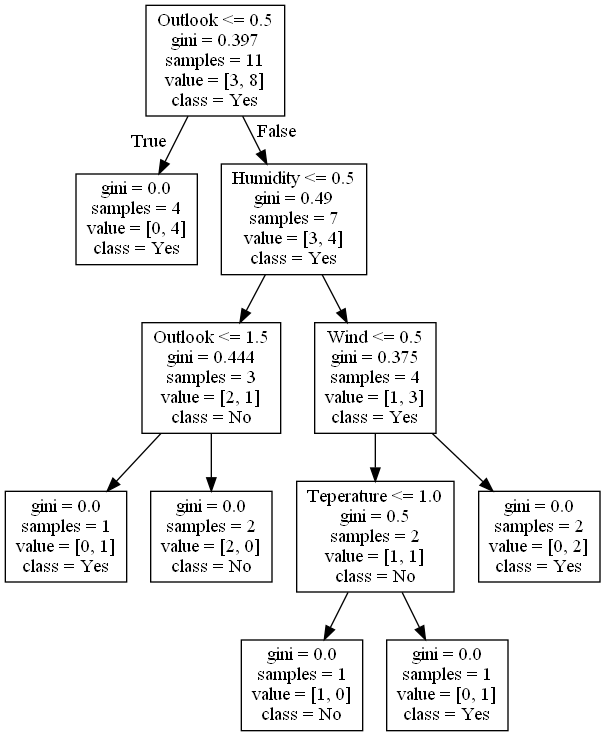

In [89]:
from PIL import Image
from io import BytesIO
Image.open(BytesIO(dot_data))

# 실행이 안되면
#import os
# path 못잡을 때 
# os.environ['PATH']
# os.environ['PATH'] = os.environ['PATH'] + ";c:/Program Files/Graphviz/bin/dot.exe"

In [104]:
from IPython.core.display import Image
dt_dot_data1 = tree.export_graphviz(dt_clf, out_file =None, feature_names=["Outlook", "Teperature","Humidity","Wind"],
                               class_names=["No", "Yes"],
                               filled = True, rounded = True,
                               special_characters=True)
dot_data1 = pydotplus.graph_from_dot_data(dt_dot_data1).create_png()
Image(dot_data.create_png())

InvocationException: GraphViz's executables not found

'C:\\Users\\Admin\\anaconda3;C:\\Users\\Admin\\anaconda3\\Library\\mingw-w64\\bin;C:\\Users\\Admin\\anaconda3\\Library\\usr\\bin;C:\\Users\\Admin\\anaconda3\\Library\\bin;C:\\Users\\Admin\\anaconda3\\Scripts;C:\\Users\\Admin\\anaconda3\\bin;C:\\Users\\Admin\\anaconda3\\condabin;C:\\Program Files\\Graphviz\\bin\\dot.exe;C:\\Program Files (x86)\\Intel\\Intel(R) Management Engine Components\\iCLS;C:\\Program Files\\Intel\\Intel(R) Management Engine Components\\iCLS;C:\\Windows\\system32;C:\\Windows;C:\\Windows\\System32\\Wbem;C:\\Windows\\System32\\WindowsPowerShell\\v1.0;C:\\Windows\\System32\\OpenSSH;C:\\Program Files\\Intel\\WiFi\\bin;C:\\Program Files\\Common Files\\Intel\\WirelessCommon;C:\\Program Files (x86)\\Intel\\Intel(R) Management Engine Components\\DAL;C:\\Program Files\\Intel\\Intel(R) Management Engine Components\\DAL;C:\\Program Files (x86)\\NVIDIA Corporation\\PhysX\\Common;C:\\WINDOWS\\system32;C:\\WINDOWS;C:\\WINDOWS\\System32\\Wbem;C:\\WINDOWS\\System32\\WindowsPowerSh